<a href="https://colab.research.google.com/github/Agarwal9897/forest_fire_analysis/blob/main/forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#importing libraries for data analysis and graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



```
About The dataset
FOD_ID = Global unique identifier.
FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.
DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.
DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.
DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.
STAT_CAUSE_CODE = Code for the (statistical) cause of the fire.
STAT_CAUSE_DESCR = Description of the (statistical) cause of the fire.
CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.
CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).
FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).
LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).
OWNER_CODE = Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.
COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.
FIPS_CODE = Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.
FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities.
```



In [92]:
#reading the dataset from the csv file
original_data = pd.read_csv("finalFires.csv")

<ipython-input-92-f69fd4ed64ae>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv("finalFires.csv")


In [93]:
#printing the shape of the dataset
original_data.shape

(597998, 20)

In [94]:
#printing the top 5 values and the bottom 5 values present in the dataset
original_data.head

<bound method NDFrame.head of         Unnamed: 0     FOD_ID  FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY  \
0                0          1       2005     2005-02-02             33   
1                1          2       2004     2004-05-12            133   
2                2          3       2004     2004-05-31            152   
3                3          4       2004     2004-06-28            180   
4                4          5       2004     2004-06-28            180   
...            ...        ...        ...            ...            ...   
597993     1872298  300308671       2015     2015-12-11            345   
597994     1872299  300308672       2015     2015-10-28            301   
597995     1872301  300308674       2015     2015-10-21            294   
597996     1872302  300308675       2015     2015-11-27            331   
597997     1872304  300308678       2015     2015-10-07            280   

        DISCOVERY_TIME  STAT_CAUSE_CODE   STAT_CAUSE_DESCR   CONT_DATE  \
0      

In [95]:
#printing the sum of null values for data preprocessing
print(original_data.isnull().sum())

Unnamed: 0          0
FOD_ID              0
FIRE_YEAR           0
DISCOVERY_DATE      0
DISCOVERY_DOY       0
DISCOVERY_TIME      0
STAT_CAUSE_CODE     0
STAT_CAUSE_DESCR    0
CONT_DATE           0
CONT_DOY            0
FIRE_SIZE           0
FIRE_SIZE_CLASS     0
LATITUDE            0
LONGITUDE           0
OWNER_CODE          0
OWNER_DESCR         0
STATE               0
COUNTY              0
FIPS_CODE           0
FIPS_NAME           0
dtype: int64


In [96]:
#removing all the unused Columns
original_data=original_data.drop(['Unnamed: 0','FOD_ID','DISCOVERY_DATE','DISCOVERY_DOY','CONT_DATE','CONT_DOY','OWNER_CODE','OWNER_DESCR','STATE','COUNTY','FIPS_CODE','FIPS_NAME'],axis =1)

In [97]:
#describing the dataset
original_data.describe(include='all')

,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE
count,597998.000000,597998.000000,597998.000000,597998,597998.000000,597998,597998.000000,597998.000000
unique,NaN,NaN,NaN,13,NaN,7,NaN,NaN
top,NaN,NaN,NaN,Debris Burning,NaN,B,NaN,NaN
freq,NaN,NaN,NaN,143220,NaN,277718,NaN,NaN
mean,2006.033799,1462.722073,5.536037,NaN,94.547328,NaN,37.380329,-93.646617
std,6.941790,384.920574,3.295156,NaN,2731.854485,NaN,5.048780,15.695774
min,1992.000000,0.000000,1.000000,NaN,0.000100,NaN,17.944924,-164.449670
25%,2001.000000,1255.000000,2.000000,NaN,0.100000,NaN,33.236440,-109.490000
50%,2007.000000,1500.000000,5.000000,NaN,0.700000,NaN,36.299099,-88.140600
75%,2012.000000,1702.000000,8.000000,NaN,3.000000,NaN,41.411111,-82.069000


In [98]:
#grouping the data by the cause of the fire and finding the mean size and year of the fire caused by that
#and also the mean latitude and longitude
original_data.groupby("STAT_CAUSE_DESCR")['FIRE_SIZE','FIRE_YEAR','LATITUDE','LONGITUDE'].mean()

<ipython-input-98-ad8d50de4403>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  original_data.groupby("STAT_CAUSE_DESCR")['FIRE_SIZE','FIRE_YEAR','LATITUDE','LONGITUDE'].mean()


,FIRE_SIZE,FIRE_YEAR,LATITUDE,LONGITUDE
STAT_CAUSE_DESCR,,,,
Arson,26.920467,2003.394746,35.235538,-87.651517
Campfire,44.627141,2008.148633,39.502437,-102.681433
Children,7.885475,2004.726266,36.188608,-88.068819
Debris Burning,13.533244,2005.352039,35.172698,-86.277380
Equipment Use,77.666958,2006.039429,37.473087,-96.368283
Fireworks,57.546763,2007.961271,39.181547,-94.804218
Lightning,322.214551,2007.134213,39.784486,-108.570383
Miscellaneous,56.582595,2007.915891,39.276966,-89.376421
Missing/Undefined,98.873797,2005.534444,36.389517,-99.107999


from matplotlib import pyplot as plt
_df_0['FIRE_SIZE'].plot(kind='hist', bins=20, title='FIRE_SIZE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['FIRE_YEAR'].plot(kind='hist', bins=20, title='FIRE_YEAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['LATITUDE'].plot(kind='hist', bins=20, title='LATITUDE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LONGITUDE'].plot(kind='hist', bins=20, title='LONGITUDE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='FIRE_SIZE', y='FIRE_YEAR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='FIRE_YEAR', y='LATITUDE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='LATITUDE', y='LONGITUDE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['FIRE_SIZE'].plot(kind='line', figsize=(8, 4), title='FIRE_SIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['FIRE_YEAR'].plot(kind='line', figsize=(8, 4), title='FIRE_YEAR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['LATITUDE'].plot(kind='line', figsize=(8, 4), title='LATITUDE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['LONGITUDE'].plot(kind='line', figsize=(8, 4), title='LONGITUDE')
plt.gca().spines[['top', 'right']].set_visible(False)

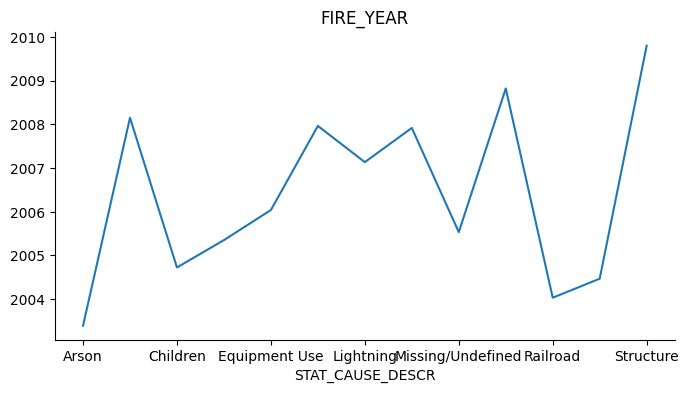

In [105]:
_df_8['FIRE_YEAR'].plot(kind='line', figsize=(8, 4), title='FIRE_YEAR')
plt.gca().spines[['top', 'right']].set_visible(False)

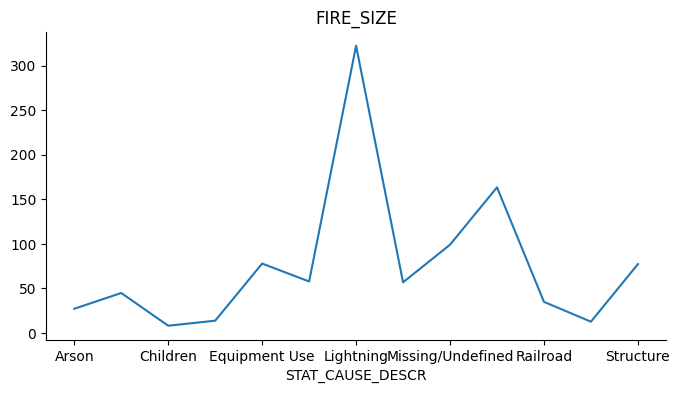

In [106]:
#line graph showing the fire size caused by different causes of fire
_df_7['FIRE_SIZE'].plot(kind='line', figsize=(8, 4), title='FIRE_SIZE')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-99-bd5ebae9d6ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = original_data.corr()


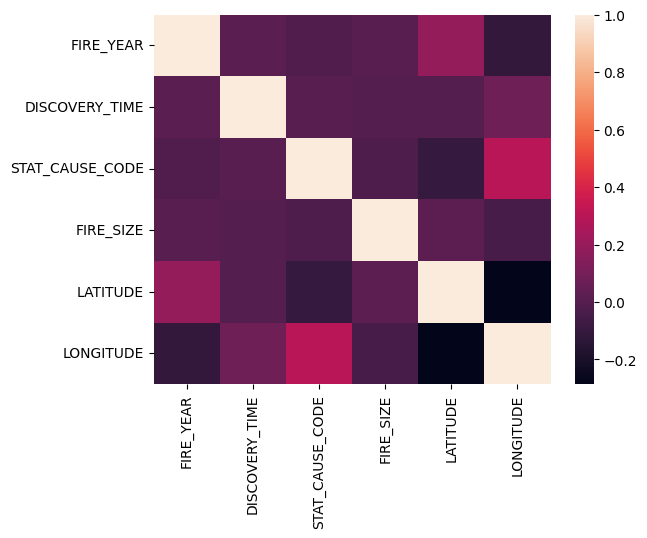

In [99]:
# Correlation matrix
corrmat = original_data.corr()
sns.heatmap(corrmat)
plt.show()